In [12]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

In [13]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [14]:
print(train_data[0].shape)
print(train_labels[0].shape)

(28, 28)
()


In [15]:
train_data[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [16]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [17]:
len(train_labels), len(test_labels)

(60000, 10000)

In [18]:
class_names = [
    "T-shirt/top",
    "Trouser/pants",
    "Pullover shirt",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
    ]

In [19]:
import matplotlib.pyplot as plt
import random

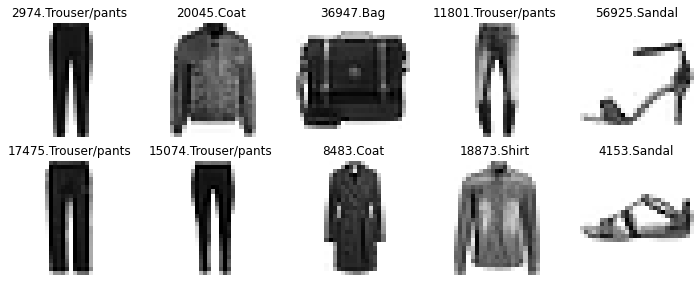

In [20]:
fig, ax = plt.subplots(2, 5, figsize=(10, 4))
ax = ax.flatten()
for i in range(10):
    index = random.choice(range(len(train_data)))
    ax[i].imshow(train_data[index], cmap=plt.cm.binary)
    ax[i].set_title(f'{index}.{class_names[train_labels[index]]}')
    ax[i].axis(False)

plt.tight_layout()
plt.show()

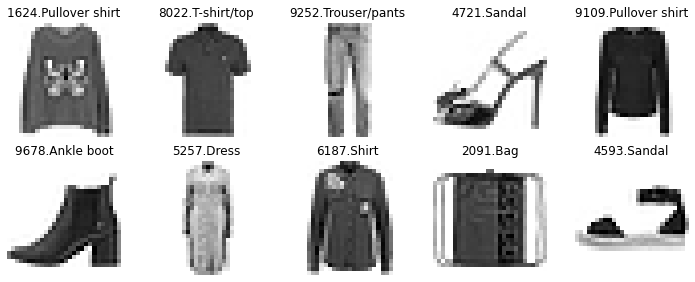

In [21]:
fig, ax = plt.subplots(2, 5, figsize=(10, 4))
ax = ax.flatten()
for i in range(10):
    index = random.choice(range(len(test_data)))
    ax[i].imshow(test_data[index], cmap=plt.cm.binary)
    ax[i].set_title(f'{index}.{class_names[test_labels[index]]}')
    ax[i].axis(False)

plt.tight_layout()
plt.show()

In [22]:
print(f'Input shape : {train_data[0].shape[0]} x {train_data[0].shape[1]}')

Input shape : 28 x 28


In [23]:
print(f'Output shape : {len(class_names)}')

Output shape : 10


In [24]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(), # labels are Integers
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

hist = model.fit(train_data, train_labels, epochs=10, validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1595 - accuracy: 0.1630 - val_loss: 1.8121 - val_accuracy: 0.2138
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.7001 - accuracy: 0.2530 - val_loss: 1.6497 - val_accuracy: 0.2853
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6252 - accuracy: 0.2843 - val_loss: 1.6026 - val_accuracy: 0.2916
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6016 - accuracy: 0.2903 - val_loss: 1.5929 - val_accuracy: 0.3068
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5829 - accuracy: 0.3030 - val_loss: 1.5754 - val_accuracy: 0.3154
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5676 - accuracy: 0.3153 - val_loss: 1.5407 - val_accuracy: 0.3322
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5244 - accuracy: 0.3510 - val_loss: 1.4987 - val_accuracy:

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 4)                 3140      
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_2 (Dense)              (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [26]:
train_data.min(), train_data.max(), test_data.min(), test_data.max()

(0, 255, 0, 255)

In [27]:
# Normalization ( 0 - 1)

train_data_norm = train_data/255.0
test_data_norm = test_data/255.0

In [28]:
train_data_norm.min(), train_data_norm.max(), test_data_norm.min(), test_data_norm.max()

(0.0, 1.0, 0.0, 1.0)

In [29]:
tf.random.set_seed(42)

model_norm = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

model_norm.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(), # labels are Integers
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

hist_norm = model_norm.fit(train_data_norm, train_labels, epochs=10, validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

In [30]:
import pandas as pd

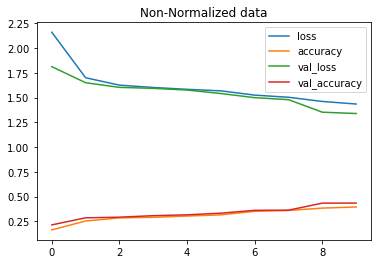

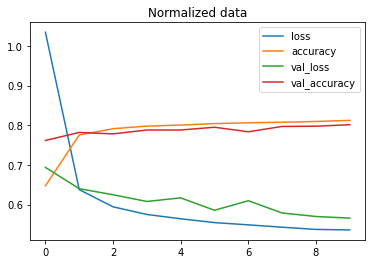

In [31]:
pd.DataFrame(hist.history).plot(title='Non-Normalized data');
pd.DataFrame(hist_norm.history).plot(title='Normalized data');

## Find ideal learning rate

In [32]:
tf.random.set_seed(42)

model_lr = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

model_lr.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

hist_lr = model_lr.fit(
    train_data_norm,
    train_labels,
    epochs=40,
    validation_data=(test_data_norm, test_labels),
    callbacks=[lr_scheduler]
)

Epoch 1/40
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808
Epoch 3/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770
Epoch 4/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871
Epoch 5/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913
Epoch 6/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940
Epoch 7/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5542 - accuracy: 0.8036 - val_loss: 0.5898 - val_accuracy:

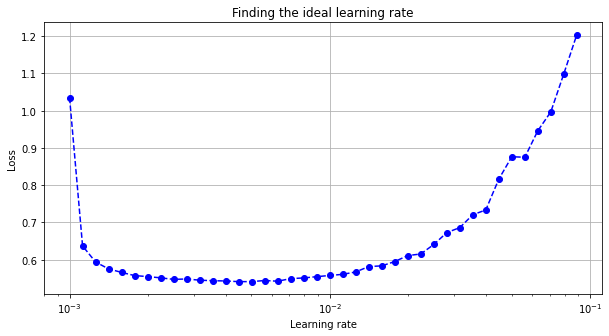

In [33]:
lrs = 1e-3 * (10 ** (tf.range(40)/20))
fig = plt.figure(figsize=(10, 5))
plt.semilogx(lrs, hist_lr.history['loss'], 'ob--')
plt.grid(True)
plt.xlabel('Learning rate')
plt.ylabel('Loss')
plt.title('Finding the ideal learning rate')
plt.show()

In [34]:
# 0.001 (1e-3) is very good learning rate

In [35]:
tf.random.set_seed(42)

model_lr_new = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

model_lr_new.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()] # ['accuracy']
)

hist_lr_new = model_lr_new.fit(
    train_data_norm,
    train_labels,
    epochs=20,
    validation_data=(test_data_norm, test_labels)
)

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0348 - sparse_categorical_accuracy: 0.6474 - val_loss: 0.6937 - val_sparse_categorical_accuracy: 0.7617
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6376 - sparse_categorical_accuracy: 0.7757 - val_loss: 0.6400 - val_sparse_categorical_accuracy: 0.7820
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5942 - sparse_categorical_accuracy: 0.7914 - val_loss: 0.6247 - val_sparse_categorical_accuracy: 0.7783
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5750 - sparse_categorical_accuracy: 0.7979 - val_loss: 0.6078 - val_sparse_categorical_accuracy: 0.7881
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5641 - sparse_categorical_accuracy: 0.8006 - val_loss: 0.6169 - val_sparse_categorical_accuracy: 0.7881
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5544 - spars

## Evaluationg the modelm

In [60]:
import numpy as np
from sklearn.metrics import confusion_matrix
import itertools

from IPython import display
display.set_matplotlib_formats('svg')

In [61]:
def displayConfusionMatrix(y_true, y_pred, text_size, classes=None, figsize = (10, 10)):

    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    n_classes = cm.shape[0]

    fig, ax = plt.subplots(figsize=figsize)
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)

    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])

    ax.set(
        title='Confusion Matrix',
        xlabel='Predicted Labels',
        ylabel='True Labels',
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels,
        )

    ax.xaxis.set_label_position('bottom')
    ax.xaxis.tick_bottom()

    ax.xaxis.label.set_size(text_size)
    ax.yaxis.label.set_size(text_size)
    ax.title.set_size(text_size)

    threshold = (cm.max() + cm.min()) / 2.0

    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f'{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)', 
        horizontalalignment='center', 
        color='white' if cm[i, j] > threshold else 'black',
        size=text_size)

In [62]:
class_names

['T-shirt/top',
 'Trouser/pants',
 'Pullover shirt',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [85]:
y_pred = np.argmax(model_lr_new(test_data_norm),axis=1)
y_pred

array([9, 2, 1, ..., 3, 1, 5], dtype=int64)

In [86]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [90]:
print(f'Test accuracy : {sum(y_pred == test_labels) / test_labels.size}')

Test accuracy : 0.8075


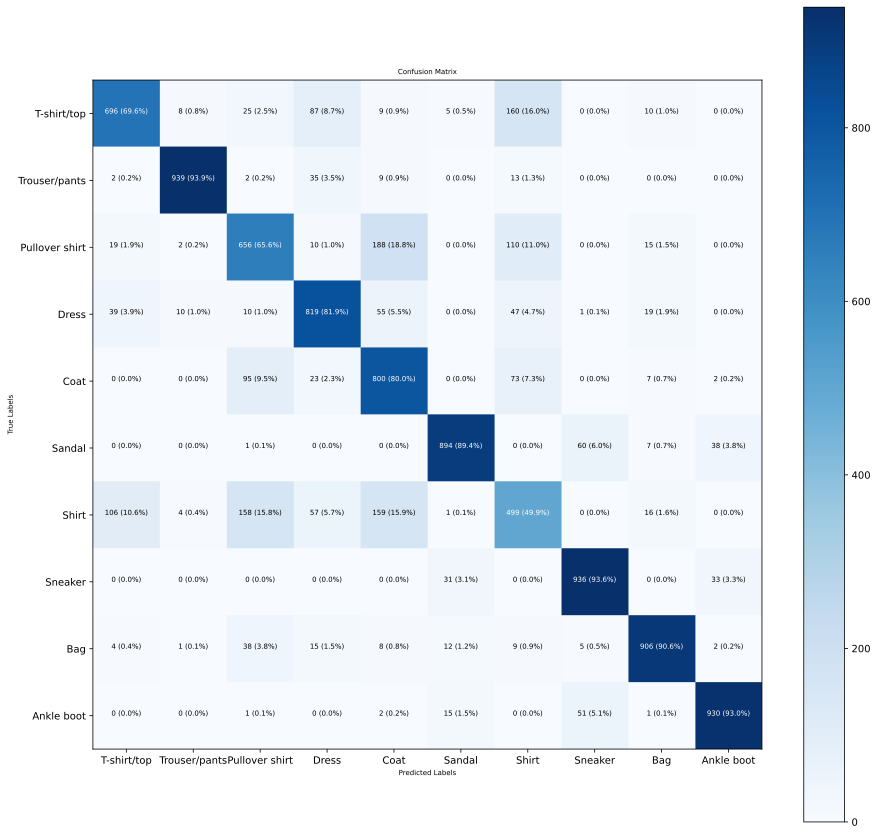

In [88]:
displayConfusionMatrix(test_labels, y_pred, 7, class_names, (15, 15))